### Deep Learning

In [1]:
digitos = read.csv(gzfile(file.choose()), header=F) # train.csv.gz

In [2]:
dim(digitos)

[1] 60000   785

In [3]:
head(digitos)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,V785
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


[1] 1 2 3 4

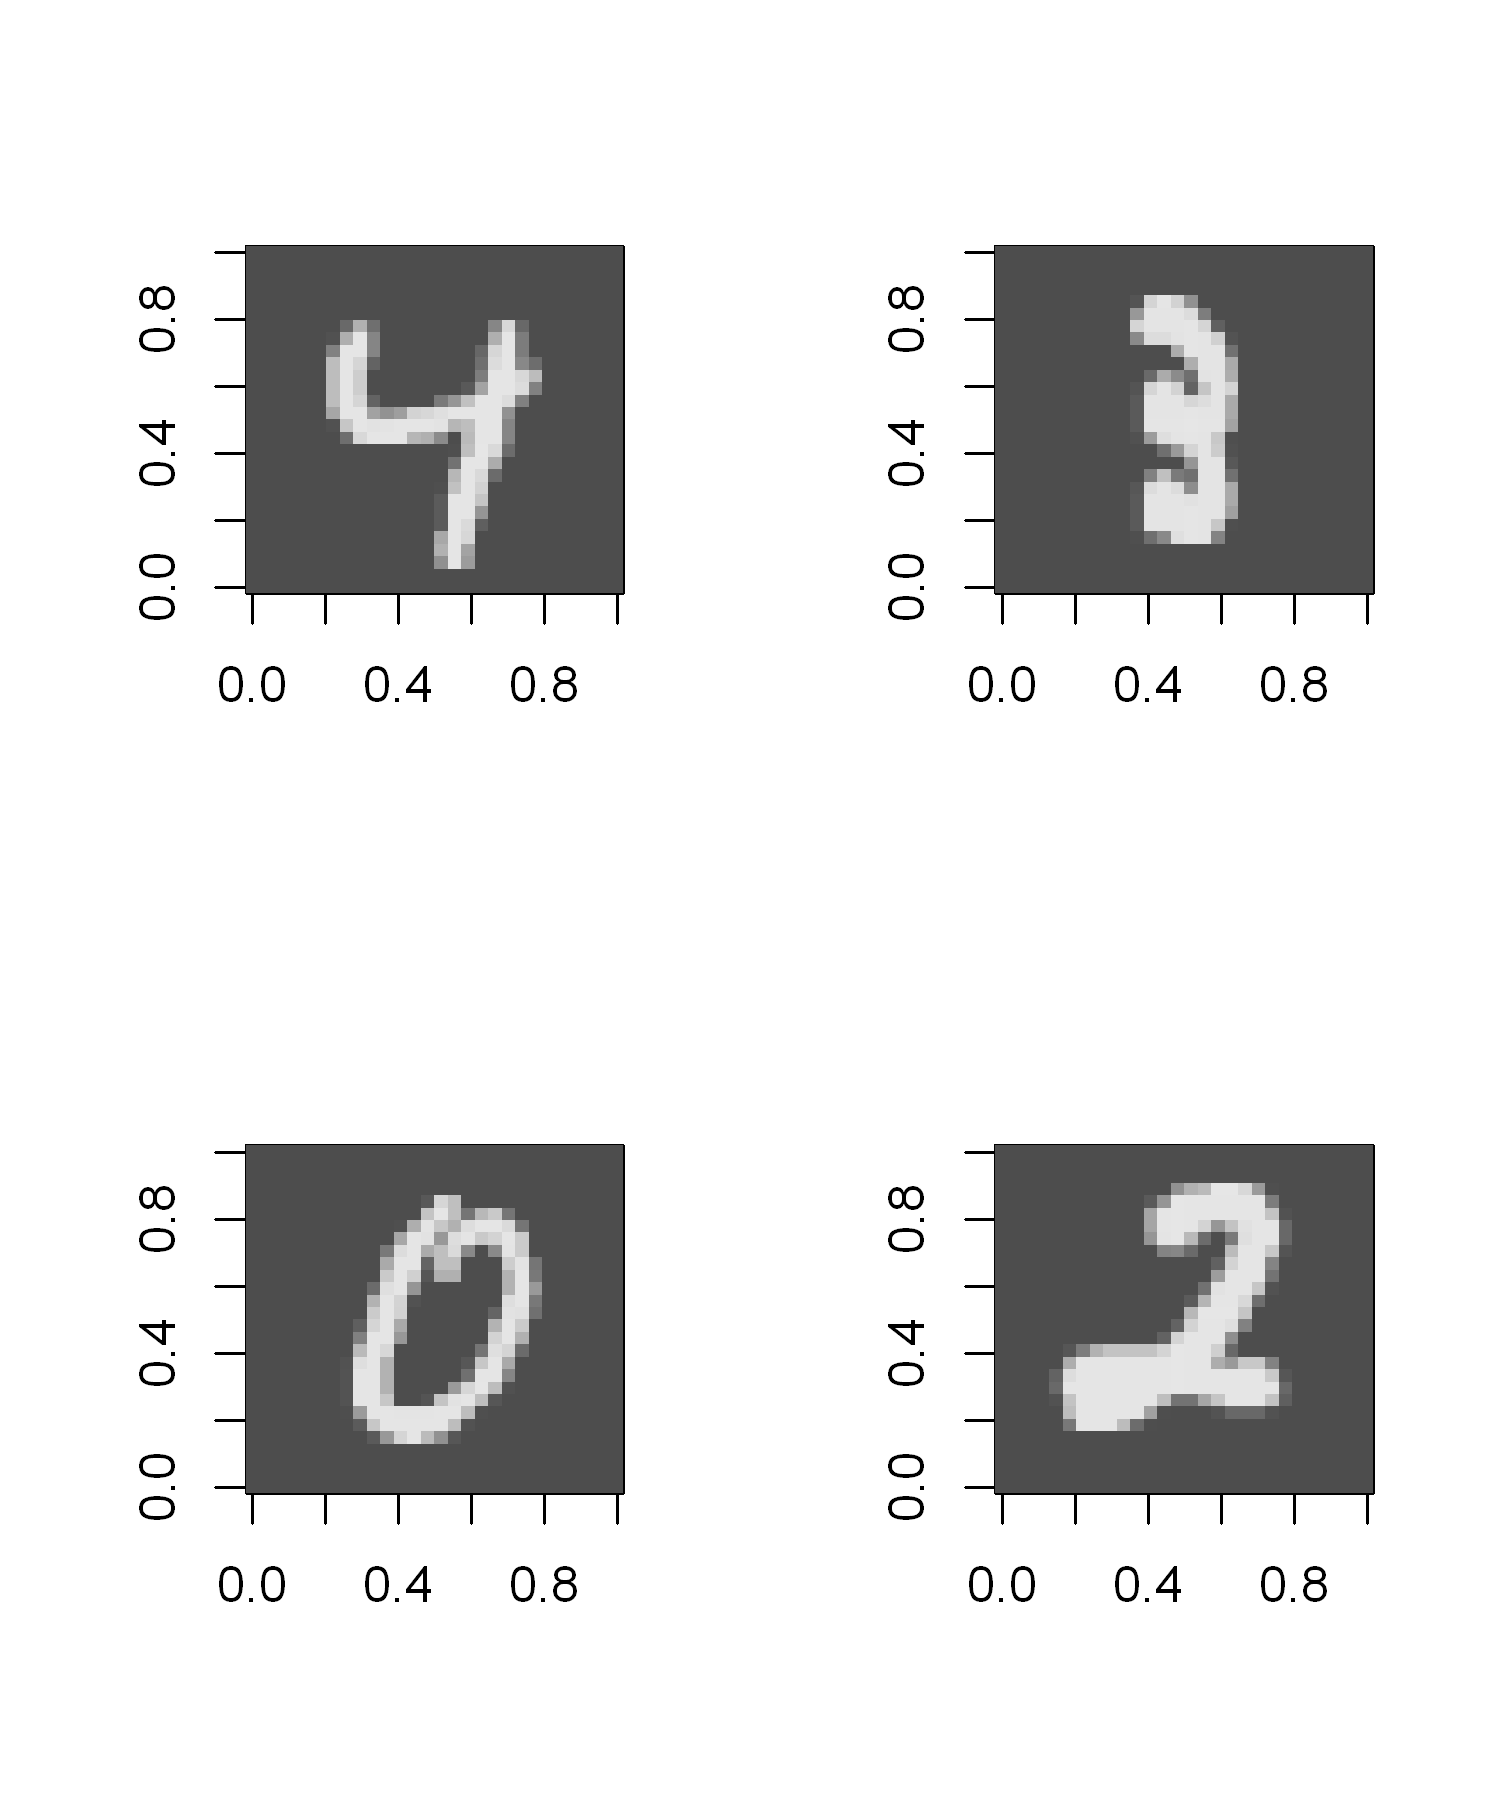

In [4]:
options(repr.plot.width=5, repr.plot.height=6, repr.plot.res=300)

split.screen(figs=c(2,2))

screen(1)
dig = t(matrix(unlist(digitos[20,-785]), nrow=28, byrow=F))
dig = t(apply(dig,2,rev))
image(dig, col=grey.colors(255))

screen(2)
dig = t(matrix(unlist(digitos[2,-785]), nrow=28, byrow=F))
dig = t(apply(dig,2,rev))
image(dig, col=grey.colors(255))

screen(3)
dig = t(matrix(unlist(digitos[4,-785]), nrow=28, byrow=F))
dig = t(apply(dig,2,rev))
image(dig, col=grey.colors(255))

screen(4)
dig = t(matrix(unlist(digitos[5,-785]), nrow=28, byrow=F))
dig = t(apply(dig,2,rev))
image(dig, col=grey.colors(255))

In [5]:
digitos[20,785]
digitos[2,785]
digitos[4,785]
digitos[5,785]

[1] 4

[1] 3

[1] 0

[1] 2

In [6]:
# install.packages("h2o")
library(h2o)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: 'h2o'


The following objects are masked from 'package:stats':

    cor, sd, var


The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




In [7]:
h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\80704055\AppData\Local\Temp\Rtmp6P8w81/h2o_80704055_started_from_r.out
    C:\Users\80704055\AppData\Local\Temp\Rtmp6P8w81/h2o_80704055_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         7 seconds 764 milliseconds 
    H2O cluster timezone:       America/Sao_Paulo 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.26.0.2 
    H2O cluster version age:    2 months and 4 days  
    H2O cluster name:           H2O_started_from_R_80704055_chu615 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.52 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal S

In [8]:
treino = h2o.importFile(file.choose()) # train.csv.gz

  |======================================================================| 100%


In [9]:
teste = h2o.importFile(file.choose()) # test.csv.gz

  |======================================================================| 100%


In [10]:
dim(treino)

[1] 60000   785

In [11]:
dim(teste)

[1] 10000   785

In [12]:
treino[,785] = as.factor(treino[,785])
teste[,785] = as.factor(teste[,785])

In [13]:
treino[,785]
teste[,785]

  C785
1    2
2    3
3    0
4    0
5    2
6    7

[60000 rows x 1 column] 

  C785
1    8
2    3
3    8
4    0
5    1
6    5

[10000 rows x 1 column] 

In [14]:
modelo = h2o.deeplearning( x = colnames(treino[,1:784]), y = "C785", training_frame=treino, validation_frame=teste, distribution="AUTO", activation="RectifierWithDropout", hidden=c(64,64,64), sparse=TRUE, epochs=20)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
"Dropping bad and constant columns: [C86, C85, C729, C728, C646, C645, C169, C760, C561, C53, C11, C55, C10, C54, C57, C12, C56, C58, C17, C19, C18, C731, C730, C20, C22, C21, C24, C23, C26, C25, C28, C27, C702, C701, C29, C700, C1, C2, C784, C3, C783, C4, C782, C5, C781, C6, C142, C7, C141, C8, C9, C31, C30, C32, C759, C758, C757, C756, C755, C477, C113, C674, C112, C673, C672, C84, C83].
"


  |======================================================================| 100%


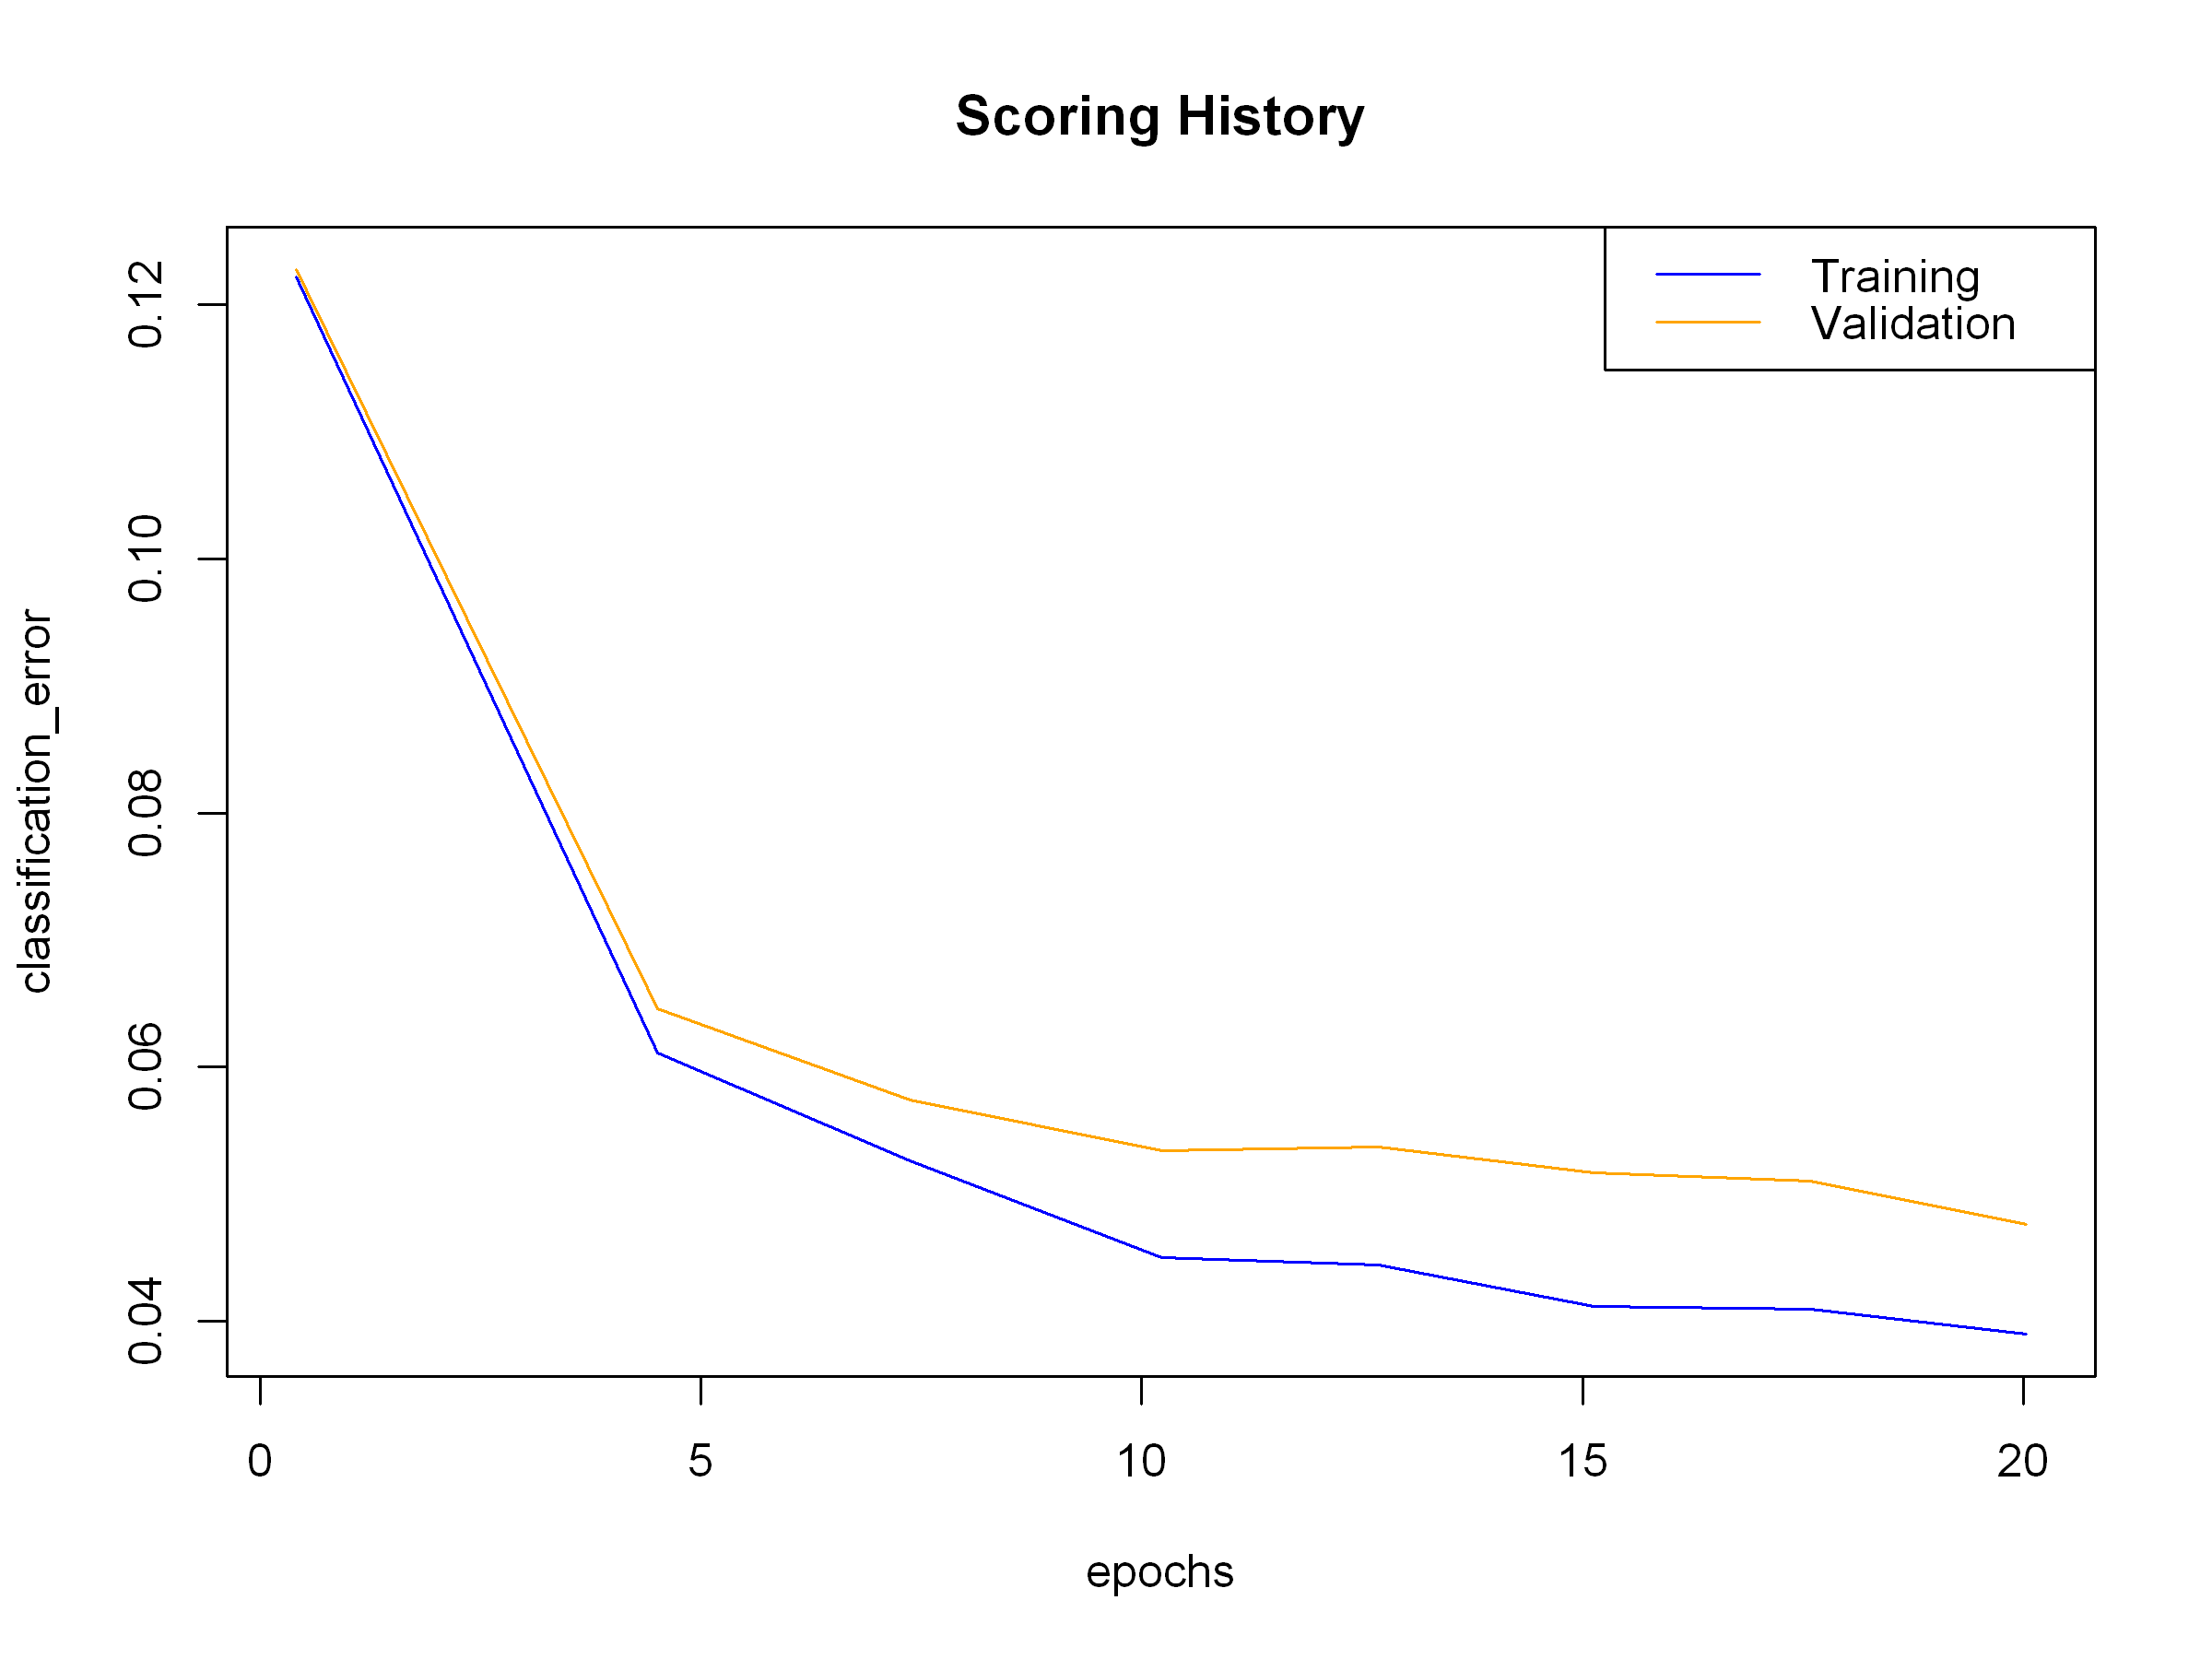

In [15]:
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
plot(modelo)

In [16]:
h2o.performance(modelo)

H2OMultinomialMetrics: deeplearning
** Reported on training data. **
** Metrics reported on temporary training frame with 9936 samples **

Training Set Metrics: 

MSE: (Extract with `h2o.mse`) 0.03456943
RMSE: (Extract with `h2o.rmse`) 0.1859286
Logloss: (Extract with `h2o.logloss`) 0.1341986
Mean Per-Class Error: 0.0389472
Confusion Matrix: Extract with `h2o.confusionMatrix(<model>,train = TRUE)`)
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
         0    1   2   3   4   5   6    7   8    9  Error          Rate
0      950    0   1   0   2   2   7    0   8    0 0.0206 =    20 / 970
1        1 1087   8   0   2   6   0    4  11    1 0.0295 =  33 / 1.120
2        2    1 914   6   8   1   3   12   7    2 0.0439 =    42 / 956
3        2    1  19 926   1  42   0    8   7    8 0.0868 =  88 / 1.014
4        0    2   1   0 973   0  10    0   1   29 0.0423 =  43 / 1.016
5        4    1   0   4   1 828   7    0   1    4 0.0259 =    22 / 850
6        4    1   2   0   

In [17]:
treino[20,785]

[1] 4
Levels: 0 1 2 3 4 5 6 7 8 9

In [18]:
pred = h2o.predict(modelo, newdata=treino[20,1:784])

  |======================================================================| 100%


In [19]:
pred$predict

  predict
1       4

[1 row x 1 column] 